In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
human_data = pd.read_table('../Datasets/human_dataset.txt')
labels = human_data['class'].to_numpy()
dna_spectral_representation = np.load('../DNA Vector Representations/human_dataset_dna_vector.npy')
print(dna_spectral_representation.shape)
print(labels.shape)

(4380, 1024)
(4380,)


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(dna_spectral_representation, labels, test_size = 0.2)

# Model : LeNet5-Architecture CNN using Keras API

In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=120, activation='relu'))

model.add(keras.layers.Dense(units=84, activation='relu'))

model.add(keras.layers.Dense(units=10, activation = 'softmax'))

<BarContainer object of 1024 artists>

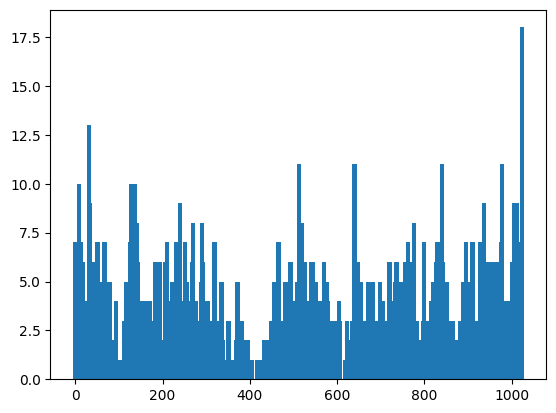

In [10]:
plt.bar(range(1024),dna_sequence_vector[32],width=10)

In [13]:
dna_sequence_vector

array([[ 4,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  0, ...,  1,  0,  1],
       [ 2,  2,  3, ...,  4,  5,  4],
       ...,
       [11,  4, 13, ...,  2,  4,  3],
       [ 2,  0,  3, ...,  0,  2,  1],
       [ 0,  0,  0, ...,  0,  1,  1]])